<p align="center">
<img src="https://github.com/adelnehme/data-upskilling-learning-club-II/blob/master/assets/datacamp_amazon.png?raw=true" alt = "DataCamp Amazon icon" width="65%">
</p>


## **Data UpSkilling Learning Club: Manipulating Data with Python**


#### **Key session takeaways**

* Import Excel files into Python using pandas — Python’s most popular data analysis package
* Join multiple datasets based on common columns
* Clean dataset by replacing missing values, and unifying categorical columns
* Aggregate data, extract insights and visualize results

<br>

#### **The Dataset**

The dataset to be used in this webinar is a XLSX file named `sales_performance.xlsx`, which contains 4 sheets:
<br>

<p align="center">
<img src="https://github.com/adelnehme/data-upskilling-learning-club-II/blob/master/assets/dataset.png?raw=true" alt = "Datasets" width="100%">
</p>

<br>

#### **Questions to answer**

- **Question 1:** How is revenue growth over time?
- **Question 2:** How is revenue growth by channel type over time?

## **Getting started with the dataset**

<font color=00AAFF> *Python has packages or modules that we download and install that allows to perform a set of tasks. We can also set aliases for these packages to shorten their name and make calling them more convenient.*<font color=00AAFF>




In [1]:
# Import relevant packages
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


<font color=00AAFF>*We will use*</font> `pandas` <font color=00AAFF>*(alias as*</font> `pd`<font color=00AAFF>*) to read an excel file using*</font> `data = pd.ExcelFile('path')` 

<font color=00AAFF>*Check out this [link](https://pandas.pydata.org/pandas-docs/stable/user_guide/io.html) for importing other data types.*<font color=00AAFF>

In [2]:
# Import the data
data = pd.ExcelFile('https://github.com/adelnehme/data-upskilling-learning-club-II/blob/master/data/sales_performance.xlsx?raw=true')

In [3]:
# Print the name of the sheets
data.sheet_names

['sales', 'customers', 'dates', 'employees']

In [4]:
# Parse sales data
sales = data.parse('sales')
# Print the header of sales data
sales.head(5)

,SalesOrderID,TotalDue,NumberofItems,OnlineOrderFlag,Status
0,43659,23153.2339,12,0,5
1,43660,1457.3288,2,0,5
2,43661,36865.8012,15,0,5
3,43662,32474.9324,22,0,5
4,43663,472.3108,1,0,5


In [5]:
# Parse customers data 
customers = data.parse('customers')
# Print the header of customers data
customers.head(5)

,SalesOrderID,CustomerFirstName,CustomerLastName,EmployeeFirstName,EmployeeLastName,ChannelType
0,43659,NaN,NaN,Tsvi,Reiter,NaN
1,43660,NaN,NaN,Tsvi,Reiter,NaN
2,43661,NaN,NaN,José,Saraiva,NaN
3,43662,NaN,NaN,José,Saraiva,NaN
4,43663,NaN,NaN,Linda,Mitchell,NaN


***Insight 1:*** There is missing data for `CustomerFirstName`, `CustomerLastName`, `EmployeeFirstName`, `EmployeeLastName` and `ChannelType` - we need to better understand the mechanisms of why this data is missing and how to best approach it.

***Insight 2:*** Ultimately, we want to evaluate employees by their performance, so might as well combine first name and last name columns into their full name before doing any analysis.

In [6]:
# Parse dates data
dates = data.parse('dates')
# Print the header of dates data
dates.head(5)

,SalesOrderID,OrderDate,ShipDate
0,43659,2011-05-31 00:00:00,2011-06-07 00:00:00
1,43660,2011-05-31 00:00:00,2011-06-07 00:00:00
2,43661,2011-05-31 00:00:00,2011-06-07 00:00:00
3,43662,2011-05-31 00:00:00,2011-06-07 00:00:00
4,43663,2011-05-31 00:00:00,2011-06-07 00:00:00


***Insight 3:*** When looking at date variables in Python and in pandas DataFrames - it's always good to remember the `datetime` data type that allows better manipulation of date variables.

In [7]:
# Parse employees data
employees = data.parse('employees')
# Print the header of employees data
employees.head(5)

,FirstName,LastName,CountryCode,RegionName,CommissionPct
0,Amy,Alberts,GB,United Kingdom,0.000
1,David,Campbell,US,Northwest,0.012
2,Garrett,Vargas,CA,Canada,0.010
3,Jae,Pak,CA,Canada,0.020
4,Jillian,Carson,US,Southwest,0.015


<font color=00AAFF>*Some important and common methods needed to get a better understanding of DataFrames are the following:*<font color=00AAFF> 

- `.info()` <font color=00AAFF>*provides a bird's eye view of column data types and missing values*</font>
- `.describe()` <font color=00AAFF>*returns a distribution of numeric columns in your DataFrame*</font>

In [ ]:
# Understand missingness of sales data
sales.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31465 entries, 0 to 31464
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   SalesOrderID     31465 non-null  int64  
 1   TotalDue         31465 non-null  float64
 2   NumberofItems    31465 non-null  int64  
 3   OnlineOrderFlag  31465 non-null  int64  
 4   Status           31465 non-null  int64  
dtypes: float64(1), int64(4)
memory usage: 1.2 MB


In [ ]:
# Understand distribution of sales data
sales.describe()

,SalesOrderID,TotalDue,NumberofItems,OnlineOrderFlag,Status
count,31465.000000,31465.000000,31465.000000,31465.000000,31465.0
mean,59391.000000,3915.995109,3.855617,0.879040,5.0
std,9083.307446,12515.462713,7.214877,0.326086,0.0
min,43659.000000,1.518300,1.000000,0.000000,5.0
25%,51525.000000,62.951900,1.000000,1.000000,5.0
50%,59391.000000,865.204000,2.000000,1.000000,5.0
75%,67257.000000,2615.490800,3.000000,1.000000,5.0
max,75123.000000,187487.825000,72.000000,1.000000,5.0


In [ ]:
# Understand column types of dates and missingness
dates.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31465 entries, 0 to 31464
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   SalesOrderID  31465 non-null  int64 
 1   OrderDate     31465 non-null  object
 2   ShipDate      31465 non-null  object
dtypes: int64(1), object(2)
memory usage: 737.6+ KB


***Insight 3:*** It's best to convert the `OrderDate` and `ShipDate` columns to `datetime`

In [ ]:
# Let's understand the degree of missingness in customers dataset
customers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31465 entries, 0 to 31464
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   SalesOrderID       31465 non-null  int64 
 1   CustomerFirstName  17463 non-null  object
 2   CustomerLastName   17463 non-null  object
 3   EmployeeFirstName  3806 non-null   object
 4   EmployeeLastName   3806 non-null   object
 5   ChannelType        17463 non-null  object
dtypes: int64(1), object(5)
memory usage: 1.4+ MB


In [ ]:
# How to find missing values?
customers.isna().sum()

SalesOrderID             0
CustomerFirstName    14002
CustomerLastName     14002
EmployeeFirstName    27659
EmployeeLastName     27659
ChannelType          14002
dtype: int64

***Insight 4:*** We notice that both customer, employee names and channel type contain missing data. Data can be missing for a variety of reasons, ranging from random to non-random causes. As such, treating missing data is highly case dependent with solutions ranging from:
* Dropping missing data
* Imputing with statistical measures such as mean, median and mode
* Algorithmic imputations relying on machine learning 
* Imputation using rules that fit the business case

In this case, the customer name is not present for B2B purchases by design - and that B2C purchases don't have employees attached to them also by design - meaning from these rules we can impute the `ChannelType` variable.

<br>

---
<center><h1> Q&A 1</h1> </center>

---

## **Data Cleaning**


**1. Convert date columns to**`datetime` **in** `dates` **DataFrame**

<font color=00AAFF>*To convert a date column to*</font> `datetime` <font color=00AAFF>*— we can use the* </font> `pd.to_datetime()` <font color=00AAFF>*function which takes in the following arguments:* </font>

- <font color=00AAFF>*The column being converted*</font>
- `format`: <font color=00AAFF>*takes in a date format (e.g.*</font>`'%Y-%m-%d'`<font color=00AAFF>*) — list of datetime formats can be found [here](https://docs.python.org/3/library/datetime.html#strftime-and-strptime-behavior).*</font>

In [8]:
# Convert data columns to datetime while keeping only Y,m,d
dates['OrderDate']= pd.to_datetime(dates['OrderDate'], format = '%Y-%m-%d') 
dates['ShipDate']= pd.to_datetime(dates['ShipDate'], format = '%Y-%m-%d') 

In [ ]:
# Make sure now into datetime
dates.info()

**2. Unify first and last names in** `customers` **and** `employees` **DataFrames**

In [9]:
# Combine first and last name in customers
customers['EmployeeFullName'] = customers['EmployeeFirstName'] + ' ' + customers['EmployeeLastName']
customers.head()

,SalesOrderID,CustomerFirstName,CustomerLastName,EmployeeFirstName,EmployeeLastName,ChannelType,EmployeeFullName
0,43659,NaN,NaN,Tsvi,Reiter,NaN,Tsvi Reiter
1,43660,NaN,NaN,Tsvi,Reiter,NaN,Tsvi Reiter
2,43661,NaN,NaN,José,Saraiva,NaN,José Saraiva
3,43662,NaN,NaN,José,Saraiva,NaN,José Saraiva
4,43663,NaN,NaN,Linda,Mitchell,NaN,Linda Mitchell


In [10]:
# Combine first and last name in employees
employees['FullName'] = employees['FirstName'] + ' ' + employees['LastName']
employees.head()

,FirstName,LastName,CountryCode,RegionName,CommissionPct,FullName
0,Amy,Alberts,GB,United Kingdom,0.000,Amy Alberts
1,David,Campbell,US,Northwest,0.012,David Campbell
2,Garrett,Vargas,CA,Canada,0.010,Garrett Vargas
3,Jae,Pak,CA,Canada,0.020,Jae Pak
4,Jillian,Carson,US,Southwest,0.015,Jillian Carson


**3. Impute missing values in** `ChannelType` **column in the** `customers` **DataFrame** 

***Insight 4*** taught us that missing data can be found for a variety of reasons, and that imputing them can be done in many ways, including creating rules that fit the business case behind the data and require some domain-knowledge. The `ChannelType` column has been imputed to reflect:

- If `EmployeeFirstName` missing $\rightarrow$ B2C purchase
- If `EmployeeFirstName` not missing $\rightarrow$ B2B purchase 

<font color=00AAFF> *The* </font> `.loc[]` <font color=00AAFF> *operator allows to subset DataFrames based on a subset of rows and column name*</font> 

In [11]:
# Impute missing values based on key business assumptions
customers.loc[customers['EmployeeFirstName'].isnull(), 'ChannelType'] = "B2C"
customers.loc[customers['EmployeeFirstName'].notnull(), 'ChannelType'] = "B2B"

In [12]:
# Make sure no more missing data in ChannelType
customers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31465 entries, 0 to 31464
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   SalesOrderID       31465 non-null  int64 
 1   CustomerFirstName  17463 non-null  object
 2   CustomerLastName   17463 non-null  object
 3   EmployeeFirstName  3806 non-null   object
 4   EmployeeLastName   3806 non-null   object
 5   ChannelType        31465 non-null  object
 6   EmployeeFullName   3806 non-null   object
dtypes: int64(1), object(6)
memory usage: 1.7+ MB


---
<center><h1> Q&A 2</h1> </center>

---

## **Q1: How did we do in revenue over the years?**

<font color=00AAFF> *Since we have revenue data for each* </font> `SalesOrderID` <font color=00AAFF> *in the* </font> `sales` <font color=00AAFF> *sheet - and the order date and ship date for each* </font> `SalesOrderID` <font color=00AAFF> *in the* </font> `dates` <font color=00AAFF> *sheet - we want to combine both DataFrames similar to how a VLOOKUP would work.* </font> 

<br>

<p align="center">
<img src="https://github.com/adelnehme/data-upskilling-learning-club-II/blob/master/assets/pivots.png?raw=True" alt = "pivot" width="70%">
</p>

<br><br>

<font color=00AAFF> *In more technical terms, we want to perform of left join of both DataFrames where* </font> `SalesOrderId` <font color=00AAFF> *is a common column between them.* </font>


<p align="center">
<img src="https://github.com/adelnehme/data-upskilling-learning-club-II/blob/master/assets/left_join.png?raw=True" alt = "DataCamp icon" width="50%">
</p>





<font color=00AAFF> *We can left-join two DataFrames using the* </font> `.merge()` <font color=00AAFF> *method* </font>

```
merged_dataframe = df_1.merge(df_2, on = 'common_column', how = 'left')
```


In [13]:
# Left join sales and dates
sales_date = sales.merge(dates, on="SalesOrderID", how = "left")
sales_date.head()

,SalesOrderID,TotalDue,NumberofItems,OnlineOrderFlag,Status,OrderDate,ShipDate
0,43659,23153.2339,12,0,5,2011-05-31,2011-06-07
1,43660,1457.3288,2,0,5,2011-05-31,2011-06-07
2,43661,36865.8012,15,0,5,2011-05-31,2011-06-07
3,43662,32474.9324,22,0,5,2011-05-31,2011-06-07
4,43663,472.3108,1,0,5,2011-05-31,2011-06-07


In [14]:
# Create column for year and month
sales_date['Order_Year'] = sales_date['OrderDate'].dt.year
sales_date['Order_YM'] = sales_date['OrderDate'].dt.strftime('%Y-%m')

<font color=00AAFF> *Similar to pivot tables, we can aggregate data around a column in a DataFrame using the* </font> `.groupby()` <font color=00AAFF> *method and chaining it with the summary statistics of choice. For example, we can group by* </font> `col_A` <font color=00AAFF> *in* </font> `df_1` <font color=00AAFF>  *and extract the sum of remaining columns using:* </font>

```
grouped_dataframe = df_1.groupby('col_A').sum()
```

In [15]:
# Extract revenue by year
sales_by_year = sales_date.groupby('Order_Year').sum().reset_index()
sales_by_year.head()

,Order_Year,SalesOrderID,TotalDue,NumberofItems,OnlineOrderFlag,Status
0,2011,71450434,1.415570e+07,5716,1201,8035
1,2012,184878045,3.767570e+07,21689,2743,19575
2,2013,798042413,4.896589e+07,56573,12584,70910
3,2014,814366923,2.241950e+07,37339,11131,58805


<font color="00AAFF"> _To create a barplot using_</font> `seaborn`<font color="00AAFF"> _we can use:_</font>

- `sns.barplot(x = , y = , data = )`
  - `x`: <font color="00AAFF"> _column name on x-axis_</font> 
  - `y`: <font color="00AAFF"> _column name on y-axis_</font> 
  - `data`: <font color="00AAFF"> _data being used_</font> 

<font color="00AAFF"> _To customize plots using_</font> `matplotlib` <font color="00AAFF"> _we can use:_</font>

- `plt.title()`: <font color="00AAFF"> _sets plot title_</font> 
- `plt.xlabel()`: <font color="00AAFF"> _sets x-axis label_</font> 
- `plt.ylabel()`: <font color="00AAFF"> _sets y-axis label_</font> 
- `plt.show()`: <font color="00AAFF"> _shows plot_</font> 


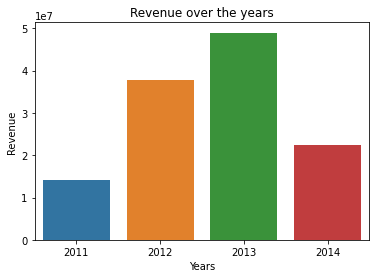

In [16]:
# Visualize it
sns.barplot(x = 'Order_Year', y = 'TotalDue', data = sales_by_year)
plt.xlabel("Years")
plt.ylabel("Revenue")
plt.title("Revenue over the years")
plt.show()

In [17]:
# Is there seasonality?
sales_by_year_month = sales_date.groupby('Order_YM').sum().reset_index()
sales_by_year_month.head()

,Order_YM,SalesOrderID,TotalDue,NumberofItems,OnlineOrderFlag,Status,Order_Year
0,2011-05,1878240,5.670209e+05,357,5,215,86473
1,2011-06,6171852,5.070965e+05,141,141,705,283551
2,2011-07,10154298,2.292183e+06,941,156,1155,464541
3,2011-08,11049625,2.800576e+06,1242,150,1250,502750
4,2011-09,6971114,5.547916e+05,157,157,785,315727


<font color="00AAFF"> _To create a lineplot using_</font> `seaborn`<font color="00AAFF"> _we can use:_</font>

- `sns.lineplot(x = , y = , data = )`
  - `x`: <font color="00AAFF"> _column name on x-axis_</font> 
  - `y`: <font color="00AAFF"> _column name on y-axis_</font> 
  - `data`: <font color="00AAFF"> _data being used_</font> 



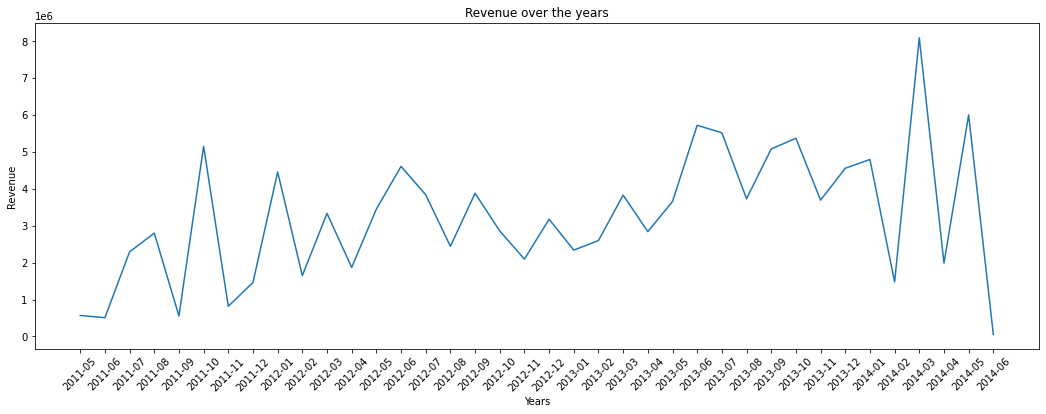

In [18]:
# Visualize it
plt.figure(figsize=(18, 6))
sns.lineplot(x = 'Order_YM', y = 'TotalDue', data = sales_by_year_month)
plt.xticks(rotation=45)
plt.xlabel("Years")
plt.ylabel("Revenue")
plt.title("Revenue over the years")
plt.show()

---
<center><h1> Q&A 3</h1> </center>

---

## **Q2: How is revenue divided by channel type over time?**

<font color="00AAFF">*Similar to how we merged the*</font> `sales` <font color="00AAFF">*sheet with the*</font> `dates` <font color="00AAFF">*sheet when answering Q1, we will be merging the* </font> `sales` <font color="00AAFF">*sheet with the*</font> `customers` <font color="00AAFF">*sheet to get the channel type, employee and customer names for each*</font> `SalesOrderID`.

<br>

<p align="center">
<img src="https://github.com/adelnehme/data-upskilling-learning-club-II/blob/master/assets/pivots2.png?raw=True" alt = "pivot" width="70%">
</p>

<br>

In [19]:
# Merge sales, dates and customers data
sales_customers_date = sales_date.merge(customers, on = "SalesOrderID", how = "left")
sales_customers_date.head()

,SalesOrderID,TotalDue,NumberofItems,OnlineOrderFlag,Status,OrderDate,ShipDate,Order_Year,Order_YM,CustomerFirstName,CustomerLastName,EmployeeFirstName,EmployeeLastName,ChannelType,EmployeeFullName
0,43659,23153.2339,12,0,5,2011-05-31,2011-06-07,2011,2011-05,NaN,NaN,Tsvi,Reiter,B2B,Tsvi Reiter
1,43660,1457.3288,2,0,5,2011-05-31,2011-06-07,2011,2011-05,NaN,NaN,Tsvi,Reiter,B2B,Tsvi Reiter
2,43661,36865.8012,15,0,5,2011-05-31,2011-06-07,2011,2011-05,NaN,NaN,José,Saraiva,B2B,José Saraiva
3,43662,32474.9324,22,0,5,2011-05-31,2011-06-07,2011,2011-05,NaN,NaN,José,Saraiva,B2B,José Saraiva
4,43663,472.3108,1,0,5,2011-05-31,2011-06-07,2011,2011-05,NaN,NaN,Linda,Mitchell,B2B,Linda Mitchell


In [20]:
# Group by year by channel type
sales_by_channel_date = sales_customers_date.groupby(['Order_Year', 'ChannelType']).sum().reset_index()
sales_by_channel_date.head()

,Order_Year,ChannelType,SalesOrderID,TotalDue,NumberofItems,OnlineOrderFlag,Status
0,2011,B2B,17999103,9.886952e+06,4515,0,2030
1,2011,B2C,53451331,4.268748e+06,1201,1201,6005
2,2012,B2B,55440422,3.061409e+07,18946,0,5860
3,2012,B2C,129437623,7.061613e+06,2743,2743,13715
4,2013,B2B,87767978,3.710689e+07,27614,0,7990


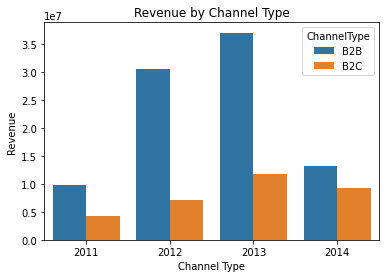

In [21]:
# Visualize
sns.barplot(x = 'Order_Year', y = 'TotalDue', hue = "ChannelType", data = sales_by_channel_date)
plt.xlabel("Channel Type")
plt.ylabel("Revenue")
plt.title("Revenue by Channel Type")
plt.show()

---
<center><h1> Q&A 4</h1> </center>

---